<a href="https://colab.research.google.com/github/javajerry/Algorithm-Trading/blob/main/LTSM_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artifical recurrent neural network called Long Short Term Memory(LSTM) 
#              to predict the closing stock proce of a corporation(applie Inc.) using the past 60 days stock price.


In [2]:
#import the library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Get the stock quoote
df = web.DataReader('AAPL', data_source='yahoo', start='2013-01-01', end='2020-12-24')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,19.821428,19.343929,19.779285,19.608213,560518000.0,17.065252
2013-01-03,19.631071,19.321428,19.567142,19.360714,352965200.0,16.849854
2013-01-04,19.236786,18.779642,19.177500,18.821428,594333600.0,16.380503
2013-01-07,18.903572,18.400000,18.642857,18.710714,484156400.0,16.284145
2013-01-08,18.996071,18.616072,18.900356,18.761072,458707200.0,16.327978
...,...,...,...,...,...,...
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996
2020-12-22,134.410004,129.649994,131.610001,131.880005,168904800.0,131.880005


In [9]:
# Get the number of rows and columns in the data set
df.shape

(2011, 6)

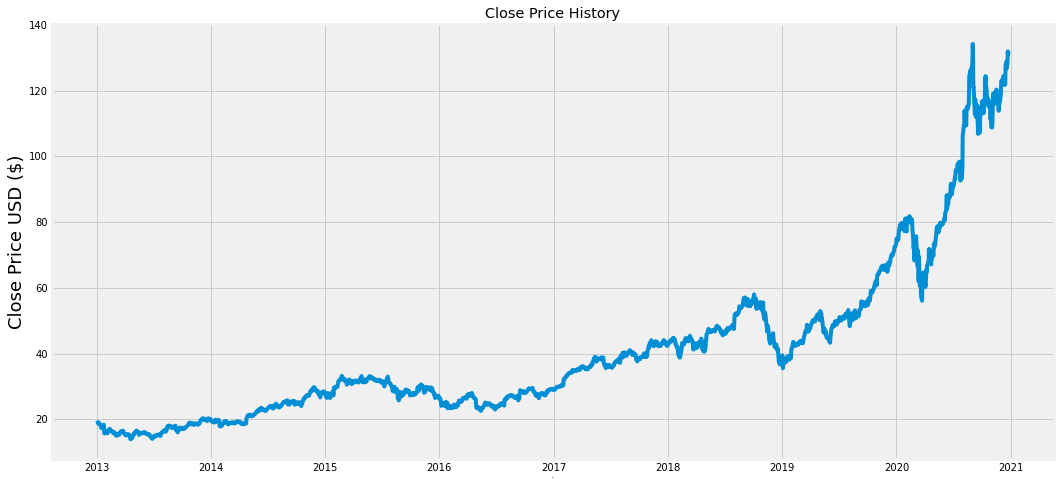

In [13]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=1)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [17]:
#Create a new daataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1609

In [20]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.9808705 ],
       [0.97321867],
       [0.98161902]])